In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series

In [20]:
# importing dataset
df = pd.read_csv('TATAMOTORS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2015,489.252289,494.149750,487.026154,493.160370,489.917236,944551
1,02-01-2015,491.973083,511.909271,491.973083,506.368683,503.038696,4193093
2,05-01-2015,504.686737,520.417969,501.322815,518.241333,514.833252,6758676
3,06-01-2015,508.891632,508.891632,493.951874,496.079071,492.816742,7979598
4,07-01-2015,489.746979,495.089661,484.008514,488.609192,485.395966,9232656


# Pre-requisite rule in TSF

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2359 non-null   object 
 1   Open       2359 non-null   float64
 2   High       2359 non-null   float64
 3   Low        2359 non-null   float64
 4   Close      2359 non-null   float64
 5   Adj Close  2359 non-null   float64
 6   Volume     2359 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 129.1+ KB


In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2359 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 129.1 KB


In [28]:
df.duplicated().sum()

0

In [30]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Durbin-Watson Test

In [33]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Open'])

0.0004248381601064135

In [35]:
sm.stats.durbin_watson(df['Close'])

0.0004477992393896222

In [37]:
sm.stats.durbin_watson(df['Volume'])

0.2703755678323774

In [39]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2359,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03
mean,2019-10-16 06:01:22.407799808,396.935476,402.071841,390.850512,396.191792,394.019840,2.379846e+07
min,2015-01-01 00:00:00,66.500000,66.900002,63.500000,65.300003,64.896851,9.445510e+05
25%,2017-05-30 12:00:00,258.250000,261.700012,252.525002,258.100006,256.506515,7.342951e+06
50%,2019-10-22 00:00:00,404.549988,409.899994,398.149994,403.649994,401.157928,1.242660e+07
75%,2022-03-02 12:00:00,481.774994,487.725006,474.674988,481.399994,478.405532,2.733780e+07
max,2024-12-07 00:00:00,1038.000000,1094.000000,1030.400024,1090.949951,1090.949951,3.905778e+08
std,NaN,202.390842,203.981276,200.188434,202.152701,201.610486,3.053952e+07


In [41]:
df.nunique()

Date         2359
Open         1880
High         2051
Low          2054
Close        2117
Adj Close    2172
Volume       2359
dtype: int64

<Axes: >

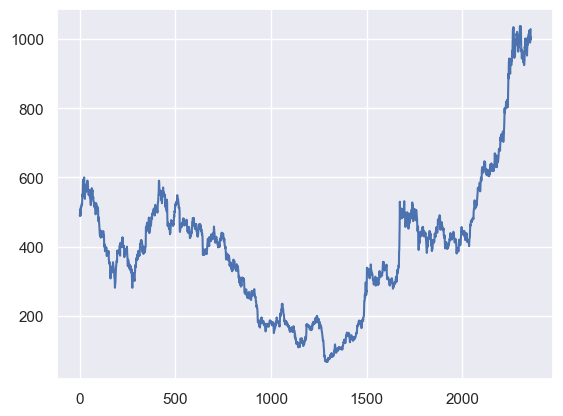

In [43]:
df['Open'].plot()

In [45]:
df['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551,2015-01-01
1,2015-02-01,491.973083,511.909271,491.973083,506.368683,503.038696,4193093,2015-02-01
2,2015-05-01,504.686737,520.417969,501.322815,518.241333,514.833252,6758676,2015-05-01
3,2015-06-01,508.891632,508.891632,493.951874,496.079071,492.816742,7979598,2015-06-01
4,2015-07-01,489.746979,495.089661,484.008514,488.609192,485.395966,9232656,2015-07-01


In [47]:
df_final_model = df.set_index('Time_Stamp')
df_final_model.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551
2015-02-01,2015-02-01,491.973083,511.909271,491.973083,506.368683,503.038696,4193093
2015-05-01,2015-05-01,504.686737,520.417969,501.322815,518.241333,514.833252,6758676
2015-06-01,2015-06-01,508.891632,508.891632,493.951874,496.079071,492.816742,7979598
2015-07-01,2015-07-01,489.746979,495.089661,484.008514,488.609192,485.395966,9232656


In [49]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2015-01-01 to 2024-07-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2359 non-null   datetime64[ns]
 1   Open       2359 non-null   float64       
 2   High       2359 non-null   float64       
 3   Low        2359 non-null   float64       
 4   Close      2359 non-null   float64       
 5   Adj Close  2359 non-null   float64       
 6   Volume     2359 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 147.4 KB


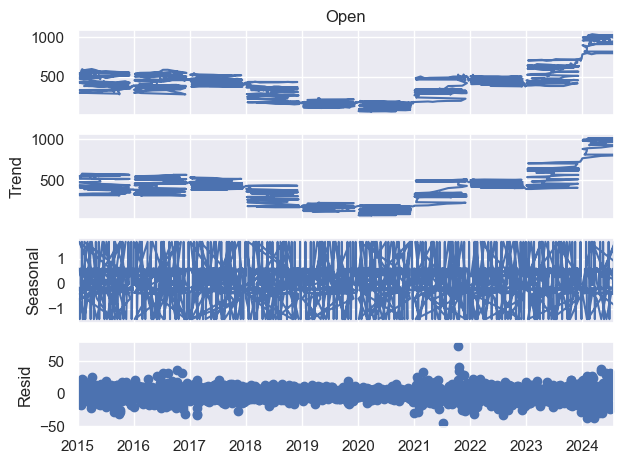

In [57]:
# Decomposition to check dataset
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_final_model['Open'], period=12)
decompose.plot()
plt.show()

# Plot the boxplot of the 'Open' variable with respect to the different years

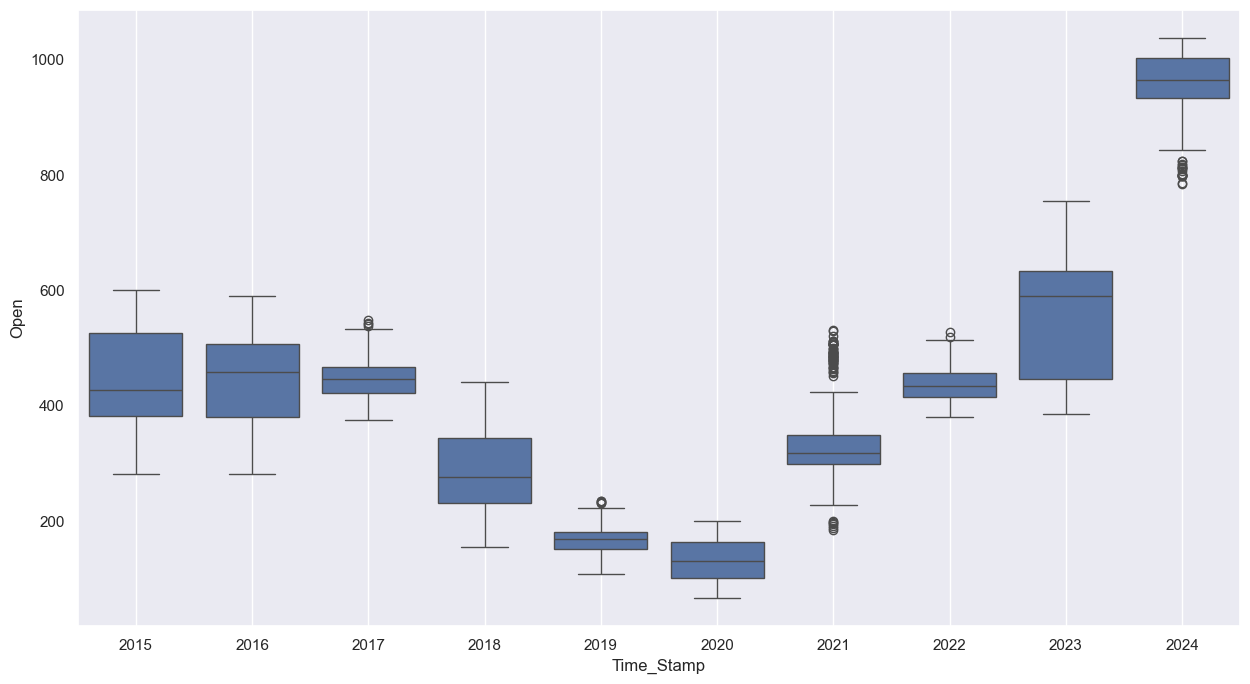

In [64]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.year, y = df_final_model['Open'])
plt.grid();

In [62]:
df_final_model.index.year

Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Time_Stamp', length=2359)

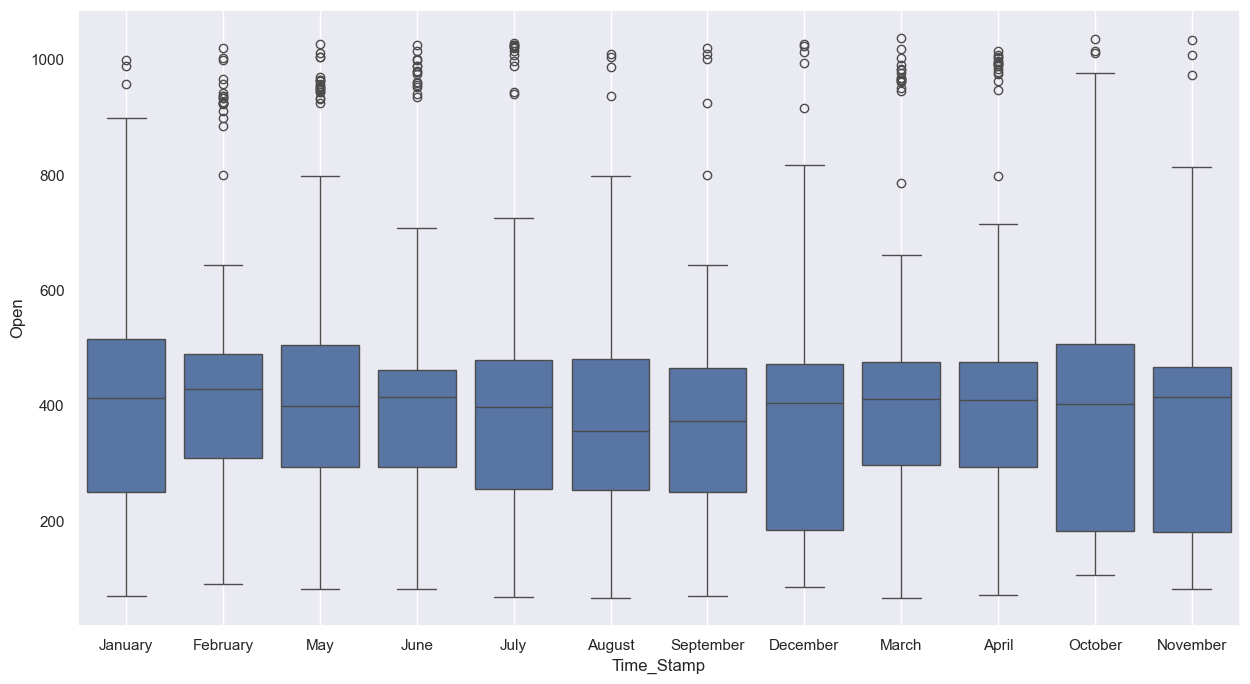

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.month_name(), y = df_final_model['Open'])
plt.grid();

# Augmented Dickey Fuller Test - To check time series data is stationary or not

In [71]:
from statsmodels.tsa.stattools import adfuller

In [73]:
adfuller(df_final_model['Open'])

(1.067663049228532,
 0.9949309676406137,
 0,
 2358,
 {'1%': -3.4331262650681884,
  '5%': -2.8627665066966537,
  '10%': -2.5674229225037246},
 16929.732322310592)

In [75]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or not")
    labels = ['ADF Stats', 'P-Values','#Lags', 'No of observation']
    for i, j in zip(result, labels):
        print(j + " :-> " + str(i))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothes and my time series is Non-Stationary")

In [77]:
check_adftest(df_final_model['Open'])

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> 1.067663049228532
P-Values :-> 0.9949309676406137
#Lags :-> 0
No of observation :-> 2358
Weak Evidence against null hypothes and my time series is Non-Stationary


In [97]:
df_final_model['1st Diff'] = df_final_model['Open'] - df_final_model['Open'].shift(1)

In [99]:
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume,1st Diff
Time_Stamp,,,,,,,,
2015-01-01,2015-01-01,489.252289,494.149750,487.026154,493.160370,489.917236,944551,NaN
2015-02-01,2015-02-01,491.973083,511.909271,491.973083,506.368683,503.038696,4193093,2.720794
2015-05-01,2015-05-01,504.686737,520.417969,501.322815,518.241333,514.833252,6758676,12.713654
2015-06-01,2015-06-01,508.891632,508.891632,493.951874,496.079071,492.816742,7979598,4.204895
2015-07-01,2015-07-01,489.746979,495.089661,484.008514,488.609192,485.395966,9232656,-19.144653
...,...,...,...,...,...,...,...,...
2024-07-19,2024-07-19,1024.000000,1024.000000,986.650024,990.000000,990.000000,7400178,1.049988
2024-07-22,2024-07-22,990.000000,1008.000000,976.549988,1003.150024,1003.150024,7396198,-34.000000
2024-07-23,2024-07-23,1007.900024,1008.650024,967.200012,1001.799988,1001.799988,10384177,17.900024


In [103]:
check_adftest(df_final_model['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -47.723753374898074
P-Values :-> 0.0
#Lags :-> 0
No of observation :-> 2357
Strong evidence against null hypothesis and my time series is Stationary


In [105]:
# split the data into train and test
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start Date of Stock  :", start_date)
print("End Data of the Stock :", end_date)

Start Date of Stock  : 2015-01-01 00:00:00
End Data of the Stock : 2024-12-07 00:00:00


In [107]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2022-02-02')]
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2022-02-02')]

In [109]:
train.shape, test.shape

((1748, 8), (611, 8))

In [111]:
train_final = train[['1st Diff']]
test_final = test[['1st Diff']]

In [113]:
train_final

,1st Diff
Time_Stamp,
2015-01-01,NaN
2015-02-01,2.720794
2015-05-01,12.713654
2015-06-01,4.204895
2015-07-01,-19.144653
...,...
2022-01-07,-7.649994
2022-01-08,6.800018
2022-01-09,3.850006


In [115]:
test_final

,1st Diff
Time_Stamp,
2022-03-01,20.799988
2022-04-01,3.299988
2022-05-01,-9.849976
2022-06-01,-5.450012
2022-07-01,8.549988
...,...
2024-07-19,1.049988
2024-07-22,-34.000000
2024-07-23,17.900024


In [119]:
check_adftest(train_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -13.288438058812034
P-Values :-> 7.446364225718826e-25
#Lags :-> 7
No of observation :-> 1739
Strong evidence against null hypothesis and my time series is Stationary


In [121]:
check_adftest(test_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -10.418661136327966
P-Values :-> 1.7275651153132242e-18
#Lags :-> 6
No of observation :-> 604
Strong evidence against null hypothesis and my time series is Stationary
